In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats
from IPython.display import display
pd.options.display.max_columns = None

# Regression - Engineering

## Exercise 1: Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. <font color='red'>A: Using surface as a categorical dummy variable, we drop carpet. The intercept then becomes the base value for how many average points are scored on that surface. The other variables are positive meaning that their averages are above carpet by an average of the coefficient value. The p values tell us if the difference between carpet is statisctially significant, and in this case only grass is significantly better than carpet.</font>

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value? <font color='red'>A: The constant can be included or excluded. If it is included one of the surface types is converted to the intercept and then the other coefficients will be the average difference in relation to the intercept. The p values in this case indicate if the value is statistically significantly different from the intercept. If the intercept is excluded, all coefficients will represent the mean for their respective categories, i.e. when the other dummies are zero. The p values here are mostly meaningless.</font>

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
# exercise 1
tennis = pd.read_csv('../data/tennis.csv')

# since we are interested in the surface and not indoor/outdoor, only the surface will be analyzed
# this will also help to make the surface types more robust in terms of n
tennis.surface = tennis.surface.str.split(": ", expand=True)[1]

smf.ols(formula='Q("player1 total points won") ~ surface', data=tennis).fit(cov_type='HC2').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("player1 total points won")   R-squared:                       0.027
Model:                                       OLS   Adj. R-squared:                  0.024
Method:                            Least Squares   F-statistic:                     7.196
Date:                           Sun, 05 Mar 2023   Prob (F-statistic):           8.80e-05
Time:                                   18:19:19   Log-Likelihood:                -4859.5
No. Observations:                           1027   AIC:                             9727.
Df Residuals:                               1023   BIC:                             9747.
Df Model:                                      3                                         
Covariance Type:                             HC2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           83.2281      3.411     24.403      0.000      76.543      89.913
surface[T.Clay]      4.8599      3.990      1.218      0.223      -2.961      12.680
surface[T.Grass]    14.9386      4.492      3.326      0.001       6.135      23.742
surface[T.Hard]      1.1546      3.556      0.325      0.745      -5.815       8.124
==============================================================================
Omnibus:                      159.189   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.808
Skew:                           0.991   Prob(JB):                     1.16e-58
Kurtosis:                       4.519   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [3]:
# no intercept
smf.ols(formula='Q("player1 total points won") ~ surface - 1', data=tennis).fit(cov_type='HC2').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("player1 total points won")   R-squared:                       0.027
Model:                                       OLS   Adj. R-squared:                  0.024
Method:                            Least Squares   F-statistic:                       nan
Date:                           Sun, 05 Mar 2023   Prob (F-statistic):                nan
Time:                                   18:19:19   Log-Likelihood:                -4859.5
No. Observations:                           1027   AIC:                             9727.
Df Residuals:                               1023   BIC:                             9747.
Df Model:                                      3                                         
Covariance Type:                             HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
surface[Carpet]    83.2281      3.411     24.403      0.000      76.543      89.913
surface[Clay]      88.0880      2.071     42.537      0.000      84.029      92.147
surface[Grass]     98.1667      2.923     33.587      0.000      92.438     103.895
surface[Hard]      84.3826      1.006     83.917      0.000      82.412      86.353
==============================================================================
Omnibus:                      159.189   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.808
Skew:                           0.991   Prob(JB):                     1.16e-58
Kurtosis:                       4.519   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [4]:
# t-test for best and second best surface types
# the p value is below 0.05 so the population means are statistically different

grass = tennis.loc[tennis.surface == 'Grass', 'player1 total points won'].dropna()
clay = tennis.loc[tennis.surface == 'Clay', 'player1 total points won'].dropna()

stats.ttest_ind(grass, clay)

Ttest_indResult(statistic=2.881235650452015, pvalue=0.0042083109878672375)

## Exercise 2: Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did <font color='red'>The first regularized model uses class, who and an engineered column fare_bin for the features based on what I know about what is likely relevant. The second model uses embarked, family_size, adult_male, and the binned deck as deck_bin which were chosen to investigate other interesting features that could be used to explain survivability. I prefer the first model because it is more straight forward to interpret, but the second model has a lower AIC and BIC and higher $R^2$ which means it is probably a better model. I experimented a bit with interaction and polynomial features but did not find any that improved the model.</font>
<p>
2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation? <font color='red'>In the first model, all features are categorical and the coefficients indicate a percent change from the base intercept survivability of a first class child who paid less than $25 fare. I find it interesting that survivability decreases for those who paid more for their fare but this is likely because it's being compared to child fare. The most imapctful feature is if one is a man there is a significant 51% decrease in survivability compared to base case. The second model also shows the highest influence for lower survivability for adult men with the next most impactful feature being having an unknown deck. Through research, I found that not having the deck assigned was probably because they were on a third class ticket in the lower decks so it would make sense that survivability is so much lower than the others. Interestingly, family size has a small but statistically significant effect in that the larger your family the lower chance that you will survive. It's clear that wealthy women and children had the best survivability.</font>
<p>
3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case. <font color='red'>For the regularized model, I tried using all features from both non-regularized models to see if there was any improvement. Based on the plot, the regularized model is not as good as the first model. The non-regularized model appears to have a decent fit already. The regularized model uses elastic net and an alpha of 0.01 and the higher the alpha the worse the model gets so regularization in this case does not seem to work very well.</font>

In [5]:
# prep the data
titanic = sns.load_dataset('titanic')

# rename annoying class column
titanic.rename(columns={'class': 'Class'}, inplace=True)

# change types
titanic.Class = titanic.Class.astype(object)
titanic.deck = titanic.deck.astype(object)
titanic.alone = titanic.alone.astype(int)
titanic.adult_male = titanic.adult_male.astype(int)

# fill nan values in age 
age_list = titanic.age.dropna()
for row in range(len(titanic.age)): # fill age nan with random age choices
    if titanic.age.isna()[row]:
        titanic.loc[row, 'age'] = np.random.choice(age_list)

# fill nan for embarked 
titanic.embarked.fillna(method='bfill', inplace=True)

# fill nan in deck
titanic.deck = titanic.deck.fillna('Unk')

# make bins for deck
titanic['deck_bin'] = titanic.deck.map(lambda x: 'ABC' if x in ['A','B','C'] else('DE' if x in ['D','E'] else ('FG' if x in ['F','G'] else 'Unk')))

# make bins for fare to test and see if they are meaningful
titanic['fare_bin'] = titanic.fare.map(lambda x: 1 if x <= 25 else(3 if x >= 125 else 2))

# make family size column
titanic['family_size'] = titanic.sibsp + titanic.parch + 1



In [6]:
# Model 1 non-regularized

# R formula to test
formula = 'survived ~ Class + who + C(fare_bin)'

model_1 = smf.ols(formula=formula, data=titanic).fit(cov_type='HC2')
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          9.68e-137
Time:                        18:19:19   Log-Likelihood:                -393.61
No. Observations:                 891   AIC:                             801.2
Df Residuals:                     884   BIC:                             834.8
Df Model:                           6                                         
Covariance Type:                  HC2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0192      0.083     12.283      0.000       0.857       1.182
Class[T.Second]     -0.2406      0.047     -5.164      0.000      -0.332      -0.149
Class[T.Third]      -0.4391      0.055     -7.929      0.000      -0.548      -0.331
who[T.man]          -0.5138      0.053     -9.654      0.000      -0.618      -0.409
who[T.woman]         0.0425      0.057      0.749      0.454      -0.069       0.154
C(fare_bin)[T.2]    -0.1208      0.046     -2.620      0.009      -0.211      -0.030
C(fare_bin)[T.3]    -0.1605      0.077     -2.095      0.036      -0.311      -0.010
==============================================================================
Omnibus:                       39.744   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.926
Skew:                           0.526   Prob(JB):                     2.89e-10
Kurtosis:                       3.279   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [7]:
# Model 2 non-regularized

# R formula to test
formula = 'survived ~ embarked + deck_bin + family_size + adult_male'

model_2 = smf.ols(formula=formula, data=titanic).fit(cov_type='HC2')
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          4.41e-131
Time:                        18:19:19   Log-Likelihood:                -384.89
No. Observations:                 891   AIC:                             785.8
Df Residuals:                     883   BIC:                             824.1
Df Model:                           7                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0979      0.043     25.265      0.000       1.013       1.183
embarked[T.Q]      -0.1071      0.053     -2.029      0.042      -0.211      -0.004
embarked[T.S]      -0.0870      0.035     -2.474      0.013      -0.156      -0.018
deck_bin[T.DE]      0.0899      0.058      1.561      0.119      -0.023       0.203
deck_bin[T.FG]     -0.1323      0.093     -1.423      0.155      -0.315       0.050
deck_bin[T.Unk]    -0.2448      0.039     -6.203      0.000      -0.322      -0.167
family_size        -0.0546      0.009     -6.281      0.000      -0.072      -0.038
adult_male         -0.5854      0.030    -19.409      0.000      -0.645      -0.526
==============================================================================
Omnibus:                       28.666   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.612
Skew:                           0.436   Prob(JB):                     2.25e-07
Kurtosis:                       3.250   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [8]:
# Model regularized

# trying to include as many features as possible and avoid too much multicollinearity, this is what I chose 
formula = 'survived ~ Class + who + C(fare_bin) + embarked + deck_bin + family_size + adult_male'

model_r = smf.ols(formula=formula, data=titanic).fit_regularized(method='elastic_net', alpha=0.01)

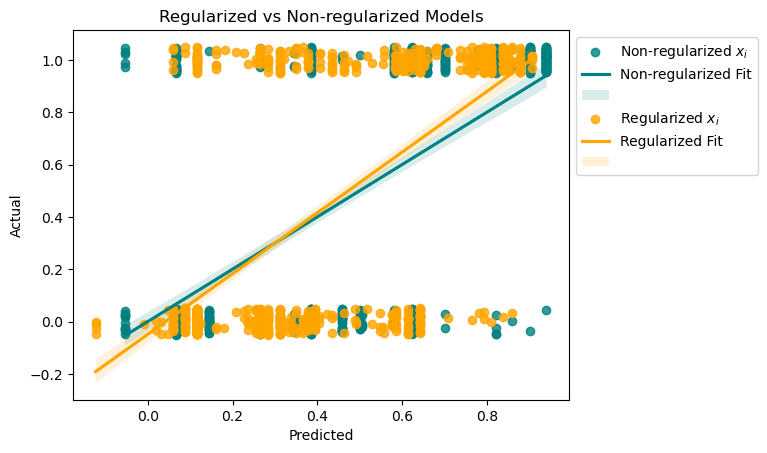

In [9]:
# plot models together

sns.regplot(x=model_1.predict(), y=titanic.survived, y_jitter= 0.05, color='teal')
sns.regplot(x=model_r.predict(), y=titanic.survived, y_jitter= 0.05, color='orange')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Regularized vs Non-regularized Models')

plt.legend(['Non-regularized $x_{i}$', 'Non-regularized Fit', '', 'Regularized $x_{i}$', 'Regularized Fit', '',], loc='upper left', bbox_to_anchor=(1, 1))


## Exercise 3: House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [10]:
df = pd.read_csv('../data/house_price.csv')
df.drop(['Id'], axis=1, inplace=True) # not needed

... Column by column to get the data in order...

In [11]:
# drop house type since there are many categorical variables and much of the info is captured elsewhere
df.drop(['MSSubClass'], axis=1, inplace=True)

In [12]:
# for zoning, going to only look at low and medium density residential because these are the most comparable and 
# have the most data then make the column 1 if low density, 0 if medium
df.drop(df[df.MSZoning == 'C (all)'].index, inplace=True)
df.drop(df[df.MSZoning == 'FV'].index, inplace=True)
df.drop(df[df.MSZoning == 'RH'].index, inplace=True)
df['MSZoning'] = df.MSZoning.map(lambda x: 1 if x == 'RL' else 0)

In [13]:
df.LotFrontage.describe()

count    1121.000000
mean       70.719001
std        24.312924
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
# transforming lot frontage to a 4 tier numeric since the data is not normal at all

# first fill lot frontage NaN with 0s since this is likely meaning zero-lot-line property
df.LotFrontage.fillna(0, inplace=True)

# using the boundaries of the 25th and 75th percentile to get roughly even numbers in each category
df['LotFrontage'] = df.LotFrontage.map(lambda x: 1 if (x>0 and x<=59) else(2 if (x>59 and x<=80) else(3 if x>80 else 0)))

In [15]:
# log transform of lot area to get it more normal, base 10 for better interpetability
df.LotArea = np.log10(df.LotArea)

In [16]:
# drop street since only 4 rows have gravel
df.drop(['Street'], axis=1, inplace=True)

In [17]:
# make alley an alley or no alley designation
df['Alley'] = df.Alley.map(lambda x: 1 if x in ['Grvl', 'Pave'] else 0)

In [18]:
# change lot shape to 1 if irregular 0 if regular
df['LotShape'] = df.LotShape.map(lambda x: 1 if x in ['IR1', 'IR2', 'IR3'] else 0)

In [19]:
# change land contour to 1 if not level
df['LandContour'] = df.LandContour.map(lambda x: 1 if x in ['Bnk', 'HLS', 'Low'] else 0)

In [20]:
# dropping utilities since only 1 row doesn't have all utilities
df.drop(['Utilities'], axis=1, inplace=True)

In [21]:
# change lot config to inside or not inside
df['LotConfig'] = df.LotConfig.map(lambda x: 1 if x in ['Corner', 'CuldSac', 'FR2', 'FR3'] else 0)

In [22]:
# change land slope to gentle or not gentle
df['LandSlope'] = df.LandSlope.map(lambda x: 1 if x in ['Mod', 'Sev'] else 0)

In [23]:
# neighborhood is a complicated one and not likely to provide much insight with linear regression so it's going
df.drop(['Neighborhood'], axis=1, inplace=True)

In [24]:
# drop condition 1 and 2 because there are few non-normal values and difficult to interpret
df.drop(['Condition1'], axis=1, inplace=True)
df.drop(['Condition2'], axis=1, inplace=True)

In [25]:
# change building type to single family or not single family
df['BldgType'] = df.BldgType.map(lambda x: 1 if x in ['2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'] else 0)

In [26]:
# change house style to 1 story, 2 story, or other
df['HouseStyle'] = df.HouseStyle.map(lambda x: 'Other' if x in ['1.5Fin','1.5Unf','SFoyer','SLvl','2.5Unf','2.5Fin'] else x)

In [27]:
# leaving overall quality and conditon as is since they can be considered numeric

In [28]:
# leave year built

In [29]:
# convert year remodeled to remodeled or not remodeled
df['YearRemodAdd'] = df.YearRemodAdd != df.YearBuilt
df['YearRemodAdd'] = df['YearRemodAdd'].astype(int)

In [30]:
# remove these columns because there's no way to make them very meaningful
df.drop(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea'], axis=1, inplace=True)

In [31]:
# convert exterior quality and contition to numeric
df['ExterQual'] = df.ExterQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['ExterCond'] = df.ExterCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [32]:
# foundation might be important but will combine low occurance types into 'other'
df['Foundation'] = df.Foundation.map(lambda x: 'Other' if x in ['Slab', 'Stone', 'Wood'] else x)

In [33]:
# basement columns converted to numeric
df['BsmtQual'] = df.BsmtQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
df['BsmtCond'] = df.BsmtCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
df['BsmtExposure'] = df.BsmtExposure.map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0})
df['BsmtFinType1'] = df.BsmtFinType1.map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})
df['BsmtFinType2'] = df.BsmtFinType2.map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})

In [34]:
# leave basement sf columns as is

In [35]:
# drop heating type column
df.drop(['Heating'], axis=1, inplace=True)

In [36]:
# heating quality and condition to numeric
df['HeatingQC'] = df.HeatingQC.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [37]:
# central air to numeric
df['CentralAir'] = df.CentralAir.map({'N': 0, 'Y': 1})

In [38]:
# electrical is mostly standard circuit breaker but just combining low counts into other
df['Electrical'] = df.Electrical.map(lambda x: 0 if x in ['FuseA', 'FuseF', 'FuseP', 'Mix'] else 1)

In [39]:
# change column names 
df = df.rename(columns={'1stFlrSF': 'FrstFlrSF', '2ndFlrSF': 'ScndFlrSF'})

In [40]:
# convert kitchen quality to numeric
df['KitchenQual'] = df.KitchenQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [41]:
# convet functional to typical or not
df['Functional'] = df.Functional.map(lambda x: 0 if x == 'Typ' else 1)

In [42]:
# fireplace quality to numeric
df['FireplaceQu'] = df.FireplaceQu.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})

In [43]:
# dropping garage type 
df.drop(['GarageType'], axis=1, inplace=True)

In [44]:
# garage finish to numeric
df['GarageFinish'] = df.GarageFinish.map({'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0})

In [45]:
# garage quality and condition to numeric
df['GarageQual'] = df.GarageQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
df['GarageCond'] = df.GarageCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})

In [46]:
# dropping most of the last columns since they did not look relevant in scatter plots or had too low counts
df.drop(['PavedDrive','OpenPorchSF','EnclosedPorch','3SsnPorch','MoSold','YrSold'], axis=1, inplace=True)
df.drop(['ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','SaleType'], axis=1, inplace=True)

In [47]:
# convert sale condition to normal or abnormal
df['SaleCondition'] = df.SaleCondition.map(lambda x: 0 if x == 'Normal' else 1)

In [48]:
df = pd.get_dummies(df)

In [49]:
df.info()
# much more manageable data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSZoning           1369 non-null   int64  
 1   LotFrontage        1369 non-null   int64  
 2   LotArea            1369 non-null   float64
 3   Alley              1369 non-null   int64  
 4   LotShape           1369 non-null   int64  
 5   LandContour        1369 non-null   int64  
 6   LotConfig          1369 non-null   int64  
 7   LandSlope          1369 non-null   int64  
 8   BldgType           1369 non-null   int64  
 9   OverallQual        1369 non-null   int64  
 10  OverallCond        1369 non-null   int64  
 11  YearBuilt          1369 non-null   int64  
 12  YearRemodAdd       1369 non-null   int32  
 13  ExterQual          1369 non-null   int64  
 14  ExterCond          1369 non-null   int64  
 15  BsmtQual           1369 non-null   int64  
 16  BsmtCond           1369 

In [50]:
# drop columns that do not appear to have any effect on sale price (checked with seaborn regplots) and one of each dummy 
# columns, dropping 1 story house style and other foundations means this will be part of the 'base case' intercept

df = df.drop(['LandContour', 'LotConfig', 'LandSlope', 'OverallCond', 'YearRemodAdd', 'ExterCond', 'BsmtFinType2', 'BsmtFinSF2',
              'LowQualFinSF', 'BsmtHalfBath', 'GarageYrBlt', 'SaleCondition', 'HouseStyle_1Story', 'Foundation_Other'], axis=1)


In [51]:
# rename columns for easier interpretation

df = df.rename(columns={'MSZoning': 'LowDensityVsMed', 'LotFrontage': 'LotFrontageBin', 'Alley': 'HasAlley', 
                        'LotShape': 'IrregularLog', 'BldgType': 'SingleFamVsMulti', 'OverallQual': 'OverallQualOutOf10', 
                        'ExterQual': 'ExterQualOutOf5', 'BsmtQual': 'BsmtQualOutOf5', 'BsmtCond': 'BsmtCondOutOf5',
                        'BsmtExposure': 'BsmtExposureOutOf4', 'BsmtFinType1': 'BsmtFinTypeOutOf6',
                        'HeatingQC': 'HeatingQCOutOf5', 'CentralAir': 'HasCentralAir', 'Electrical': 'SbkrOrOther',
                        'KitchenQual': 'KitchenQualOutOf5', 'Functional': 'AbnormalFunctionality',
                        'FireplaceQu': 'FireplaceQuOutOf5', 'GarageFinish': 'GarageFinishQltyOutOf3',
                        'GarageQual': 'GarageQualOutOf5', 'GarageCond': 'GarageCondOutOf5', 'LotArea': 'LogOfLotArea'})

In [52]:
# cleaned up data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LowDensityVsMed         1369 non-null   int64  
 1   LotFrontageBin          1369 non-null   int64  
 2   LogOfLotArea            1369 non-null   float64
 3   HasAlley                1369 non-null   int64  
 4   IrregularLog            1369 non-null   int64  
 5   SingleFamVsMulti        1369 non-null   int64  
 6   OverallQualOutOf10      1369 non-null   int64  
 7   YearBuilt               1369 non-null   int64  
 8   ExterQualOutOf5         1369 non-null   int64  
 9   BsmtQualOutOf5          1369 non-null   int64  
 10  BsmtCondOutOf5          1369 non-null   int64  
 11  BsmtExposureOutOf4      1369 non-null   int64  
 12  BsmtFinTypeOutOf6       1369 non-null   int64  
 13  BsmtFinSF1              1369 non-null   int64  
 14  BsmtUnfSF               1369 non-null   

In [53]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [54]:
formula = f'SalePrice ~ {" + ".join(X.columns)}'
formula

'SalePrice ~ LowDensityVsMed + LotFrontageBin + LogOfLotArea + HasAlley + IrregularLog + SingleFamVsMulti + OverallQualOutOf10 + YearBuilt + ExterQualOutOf5 + BsmtQualOutOf5 + BsmtCondOutOf5 + BsmtExposureOutOf4 + BsmtFinTypeOutOf6 + BsmtFinSF1 + BsmtUnfSF + TotalBsmtSF + HeatingQCOutOf5 + HasCentralAir + SbkrOrOther + FrstFlrSF + ScndFlrSF + GrLivArea + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQualOutOf5 + TotRmsAbvGrd + AbnormalFunctionality + Fireplaces + FireplaceQuOutOf5 + GarageFinishQltyOutOf3 + GarageCars + GarageArea + GarageQualOutOf5 + GarageCondOutOf5 + WoodDeckSF + HouseStyle_2Story + HouseStyle_Other + Foundation_BrkTil + Foundation_CBlock + Foundation_PConc'

In [55]:
house_model = smf.ols(formula=formula, data=df).fit()
house_model.summary()

# this model is not great with very high AIC and BIC, will try polynomial features to see if any better

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:19:21   Log-Likelihood:                -16191.
No. Observations:                1369   AIC:                         3.247e+04
Df Residuals:                    1325   BIC:                         3.270e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -8.016e+04   1.43e+05     -0.562      0.574    -3.6e+05       2e+05
LowDensityVsMed         1369.9936   3354.006      0.408      0.683   -5209.747    7949.734
LotFrontageBin          1786.3679   1040.392      1.717      0.086    -254.627    3827.363
LogOfLotArea            2.263e+04   6293.201      3.596      0.000    1.03e+04     3.5e+04
HasAlley               -5914.8378   4990.337     -1.185      0.236   -1.57e+04    3874.985
IrregularLog            1181.3050   2197.065      0.538      0.591   -3128.800    5491.410
SingleFamVsMulti       -8686.4306   3664.789     -2.370      0.018   -1.59e+04   -1497.008
OverallQualOutOf10      1.331e+04   1313.921     10.134      0.000    1.07e+04    1.59e+04
YearBuilt                -45.3841     72.168     -0.629      0.530    -186.961      96.193
ExterQualOutOf5         1.405e+04   2821.710      4.980      0.000    8516.409    1.96e+04
BsmtQualOutOf5          7389.7187   2197.244      3.363      0.001    3079.262    1.17e+04
BsmtCondOutOf5         -6500.3126   2716.099     -2.393      0.017   -1.18e+04   -1171.990
BsmtExposureOutOf4      6497.4059   1072.514      6.058      0.000    4393.395    8601.417
BsmtFinTypeOutOf6       1417.0676    704.446      2.012      0.044      35.117    2799.019
BsmtFinSF1                 5.1403      6.096      0.843      0.399      -6.819      17.100
BsmtUnfSF                 -4.0945      6.132     -0.668      0.504     -16.125       7.936
TotalBsmtSF                3.5756      7.489      0.477      0.633     -11.116      18.267
HeatingQCOutOf5         1247.9757   1229.308      1.015      0.310   -1163.626    3659.577
HasCentralAir           1853.4426   4718.530      0.393      0.695   -7403.162    1.11e+04
SbkrOrOther            -3124.5775   3665.727     -0.852      0.394   -1.03e+04    4066.684
FrstFlrSF                 46.5620     21.508      2.165      0.031       4.368      88.756
ScndFlrSF                 63.0837     21.512      2.933      0.003      20.883     105.284
GrLivArea                 -5.0944     21.064     -0.242      0.809     -46.417      36.229
BsmtFullBath            3379.2991   2552.357      1.324      0.186   -1627.803    8386.401
FullBath                3529.5142   2830.604      1.247      0.213   -2023.440    9082.468
HalfBath                4680.2665   2764.989      1.693      0.091    -743.967    1.01e+04
BedroomAbvGr           -7102.8554   1754.194     -4.049      0.000   -1.05e+04   -3661.554
KitchenAbvGr           -1.771e+04   5867.999     -3.017      0.003   -2.92e+04   -6194.044
KitchenQualOutOf5       1.035e+04   2148.259      4.820      0.000    6140.602    1.46e+04
TotRmsAbvGrd            4801.9514   1267.546      3.788      0.000    2315.336    7288.567
AbnormalFunctionality  -1.417e+04   3805.628     -3.724      0.000   -2.16e+04  

In [56]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [57]:
# build easier to use R formula from PolynomialFeatures
def to_formula(poly_features, no_interactions=False):
    names = pd.DataFrame(poly_features.get_feature_names_out())[0]
    formula = ''
    if no_interactions:
        for name in names:
            if '^' in name:
                name = f'I({name})'
            if " " not in name:
                formula = formula + f'{name.replace("^", "**")} + '
    else:
        for name in names:
            interaction_list = name.split(" ")
            for i in range(len(interaction_list)):
                if '^' in interaction_list[i]:
                    interaction_list[i] = f'I({interaction_list[i]})'
            interaction_list = ":".join(interaction_list)
            formula = formula + f'{interaction_list.replace("^", "**")} + '
    formula = formula[:-3]
    return formula


In [58]:
features = to_formula(poly, no_interactions=True)
formula_poly = f'SalePrice ~ {features}'

In [59]:
house_model_poly = smf.ols(formula=formula_poly, data=df).fit()
house_model_poly.summary()

# ever so slightly better AIC and BIC but will try removing insignificant polynomial features

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:19:21   Log-Likelihood:                -15743.
No. Observations:                1369   AIC:                         3.169e+04
Df Residuals:                    1265   BIC:                         3.224e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -298.0486    124.067     -2.402      0.016    -541.448     -54.649
LowDensityVsMed                 1487.0268    897.383      1.657      0.098    -273.495    3247.549
LotFrontageBin                  2764.6437   6859.360      0.403      0.687   -1.07e+04    1.62e+04
LogOfLotArea                    1.097e+06   4.77e+05      2.299      0.022    1.61e+05    2.03e+06
HasAlley                        1362.9912   1265.039      1.077      0.281   -1118.814    3844.796
IrregularLog                    1033.0438    564.012      1.832      0.067     -73.458    2139.546
SingleFamVsMulti               -1512.9688   1120.942     -1.350      0.177   -3712.079     686.141
OverallQualOutOf10              2.333e+04   1.43e+04      1.629      0.104   -4770.600    5.14e+04
YearBuilt                      -8114.3657   2699.555     -3.006      0.003   -1.34e+04   -2818.267
ExterQualOutOf5                -3.215e+04    8.8e+04     -0.365      0.715   -2.05e+05     1.4e+05
BsmtQualOutOf5                 -2.829e+04   4.57e+04     -0.619      0.536   -1.18e+05    6.14e+04
BsmtCondOutOf5                  1.118e+04   6.04e+04      0.185      0.853   -1.07e+05     1.3e+05
BsmtExposureOutOf4              1.417e+04   2.32e+04      0.612      0.540   -3.12e+04    5.96e+04
BsmtFinTypeOutOf6              -2573.8712   1.01e+04     -0.256      0.798   -2.23e+04    1.72e+04
BsmtFinSF1                         0.5333     11.244      0.047      0.962     -21.526      22.592
BsmtUnfSF                          0.5372     10.978      0.049      0.961     -21.000      22.074
TotalBsmtSF                      -14.7452     26.167     -0.564      0.573     -66.080      36.590
HeatingQCOutOf5                 1.668e+04   3.97e+04      0.420      0.675   -6.13e+04    9.46e+04
HasCentralAir                   1592.5281   1258.867      1.265      0.206    -877.170    4062.226
SbkrOrOther                     -168.2560    940.036     -0.179      0.858   -2012.458    1675.946
FrstFlrSF                         13.2016     40.754      0.324      0.746     -66.752      93.155
ScndFlrSF                        161.2870     22.347      7.217      0.000     117.446     205.128
GrLivArea                       -207.5651     29.574     -7.019      0.000    -265.584    -149.546
BsmtFullBath                    2.208e+04   1.65e+04      1.341      0.180   -1.02e+04    5.44e+04
FullBath                       -2.528e+04    2.4e+04     -1.055      0.292   -7.23e+04    2.17e+04
HalfBath                        8419.2197   2355.104      3.575      0.000    3798.881     1.3e+04
BedroomAbvGr                   -1.179e+04   1.13e+04     -1.041      0.298    -3.4e+04    1.04e+04
KitchenAbvGr                    3.147e+04   4.95e+04      0.635      0.525   -6.57e+04    1.29e+05
KitchenQualOut

In [60]:
# quickly modify formula to remove the highest p value of polynomial or interaction feature
# dangerous function if not paying attention...
def remove_highest_pvalue(model, formula, p=0.05, print_vals=True):
    
    # polynomial or interaction features to consider for removal
    pvalues = model.pvalues[model.pvalues.index.str.contains(':') | model.pvalues.index.str.contains('\*')]
    
    # get the base features that have no interaction or polynomial connection and add to drop consideration
    base = model.pvalues[~model.pvalues.index.str.contains(':') & ~model.pvalues.index.str.contains('\*')]
    for i in range(len(base.index)):
        if not any(base.index[i] in sub for sub in pvalues.index):
            pvalues = pd.concat([pvalues, base.iloc[[i]]])
    
    feature = pvalues[pvalues == pvalues.max()].index[0] # get the highest pvalue feature
    if pvalues[feature] > p:
        try:
            feature_to_remove = f"+ {feature.replace(' ', '')} " # include leading plus for string search
            feature_loc = formula.rindex(feature_to_remove) # index for slicing formula
        except: # if the last feature in formula
            feature_to_remove = f" + {feature.replace(' ', '')}" # include leading plus for string search
            feature_loc = formula.rindex(feature_to_remove) # index for slicing formula
        formula = formula[:feature_loc] + formula[feature_loc + len(feature_to_remove):] # splice out feature from formula
        if print_vals:
            print(f'{feature} removed with p value {pvalues[feature]}')
        return formula
    else:
        if print_vals:
            print(f'highest p value is {pvalues[feature]} for {feature}; nothing removed')
        return formula
    
# recursive function to remove high p values until all p values of polynomial and interaction features are below 0.05
def remove_all_high_pvalues(df, model, formula, p=0.05):
    # need to repeat the pvalue list code to test if the minimum p has been reached
    pvalues = model.pvalues[model.pvalues.index.str.contains(':') | model.pvalues.index.str.contains('\*')]
    base = model.pvalues[~model.pvalues.index.str.contains(':') & ~model.pvalues.index.str.contains('\*')]
    for i in range(len(base.index)):
        if not any(base.index[i] in sub for sub in pvalues.index):
            pvalues = pd.concat([pvalues, base.iloc[[i]]])
    
    if pvalues.max() > p:
        # get new formula with highest p value removed
        formula = remove_highest_pvalue(model, formula, p, print_vals=False)
        
        # get new model from new formula
        model = smf.ols(formula=formula, data=df).fit()
        
        # rerun to remove another feature if needed
        return remove_all_high_pvalues(df, model, formula, p)
    
    return formula    


In [61]:
# need an interim step with these functions
formula_poly_reduced = remove_highest_pvalue(house_model_poly, formula_poly)

house_model_poly_reduced = smf.ols(formula=formula_poly_reduced, data=df).fit()

I(LotFrontageBin ** 2) removed with p value 0.9764787666554962


In [62]:
# get the new formula by iteratively removing highest p values
formula_poly_reduced = remove_all_high_pvalues(df, house_model_poly_reduced, formula_poly_reduced)

In [63]:
house_model_poly_reduced = smf.ols(formula=formula_poly_reduced, data=df).fit()
house_model_poly_reduced.summary()

# slightly reduced AIC and BIC again so will rest at this model
# there is going to be multicollinearity here but it would take awhile to make a perfect model
# interpretability is maintained in this model as each feature has coefficients that can be seen as an increase
# or decrease in sale price per unit of the feature

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:19:39   Log-Likelihood:                -15772.
No. Observations:                1369   AIC:                         3.165e+04
Df Residuals:                    1317   BIC:                         3.192e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -436.8877    174.399     -2.505      0.012    -779.017     -94.758
LogOfLotArea                   1.104e+06   4.47e+05      2.469      0.014    2.27e+05    1.98e+06
SingleFamVsMulti              -2335.0918    988.638     -2.362      0.018   -4274.570    -395.614
OverallQualOutOf10             2.752e+04   1.22e+04      2.265      0.024    3684.768    5.14e+04
YearBuilt                     -6942.6366   2298.700     -3.020      0.003   -1.15e+04   -2433.123
ExterQualOutOf5                9193.3493   2158.717      4.259      0.000    4958.449    1.34e+04
BsmtQualOutOf5                -4.141e+04   7958.436     -5.204      0.000    -5.7e+04   -2.58e+04
BsmtCondOutOf5                 2.246e+04   6652.049      3.376      0.001    9407.436    3.55e+04
BsmtExposureOutOf4             4718.5265    802.477      5.880      0.000    3144.253    6292.800
BsmtFinTypeOutOf6              1261.7115    536.907      2.350      0.019     208.426    2314.997
BsmtFinSF1                        8.3812      2.958      2.833      0.005       2.578      14.185
TotalBsmtSF                      18.2838      4.207      4.346      0.000      10.031      26.536
HeatingQCOutOf5                2829.3423    893.493      3.167      0.002    1076.518    4582.166
FrstFlrSF                       -32.5923     32.643     -0.998      0.318     -96.631      31.446
ScndFlrSF                       167.0129     21.109      7.912      0.000     125.602     208.424
GrLivArea                      -195.1571     28.268     -6.904      0.000    -250.611    -139.703
FullBath                      -1.683e+04   8389.381     -2.006      0.045   -3.33e+04    -372.691
HalfBath                       9190.7916   2247.903      4.089      0.000    4780.931    1.36e+04
BedroomAbvGr                  -4677.4482   1347.286     -3.472      0.001   -7320.510   -2034.386
KitchenAbvGr                  -1.426e+04   4539.283     -3.142      0.002   -2.32e+04   -5355.357
KitchenQualOutOf5             -1.005e+04   5621.315     -1.788      0.074   -2.11e+04     974.225
TotRmsAbvGrd                   3.689e+04   1.17e+04      3.148      0.002    1.39e+04    5.99e+04
AbnormalFunctionality         -4626.1882    948.578     -4.877      0.000   -6487.077   -2765.299
Fireplaces                     5130.9170   1338.561      3.833      0.000    2504.973    7756.861
GarageCars                     9589.3815   2388.541      4.015      0.000    4903.620    1.43e+04
GarageArea                     -194.1279     40.610     -4.780      0.000    -273.796    -114.460
GarageQualOutOf5               9946.8726   2351.213      4.231      0.000    5334.341    1.46e+04
WoodDeckSF                      -36.2344     23.507     -1.541      0.123     -82.350       9.881
HouseStyle_Other              -2314.2446    7

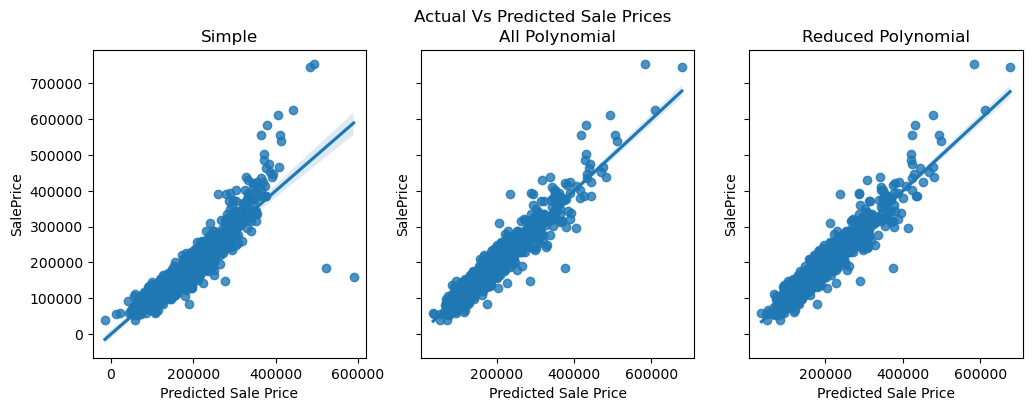

In [64]:
# quick visual check of the models performance with predicted vs actual sale prices

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))

sns.regplot(x=house_model.predict(X), y=y, ax=ax1, )
ax1.set_title('Simple')
ax1.set_xlabel('Predicted Sale Price')

sns.regplot(x=house_model_poly.predict(X), y=y, ax=ax2)
ax2.set_title('All Polynomial')
ax2.set_xlabel('Predicted Sale Price')

sns.regplot(x=house_model_poly_reduced.predict(X), y=y, ax=ax3)
ax3.set_title('Reduced Polynomial')
ax3.set_xlabel('Predicted Sale Price')

plt.suptitle('Actual Vs Predicted Sale Prices')
plt.show()

# comparing predicted and actual sale prices we see that the simple model with no polynomial features has some 
# larger outliers, whereas the other two models performed about the same

In [65]:
def make_plot_table(ols_model, feature_of_interest):
    df = pd.DataFrame(ols_model.model.data.exog)
    df.columns = ols_model.model.exog_names
    for column in df:
        if feature_of_interest in df[column].name:
            xrange = np.linspace(df[column].min(), df[column].max(), len(df))
            df[column] = xrange
        else:
            df[column] = df[column].mean()
    return df

In [66]:
house_model_poly_reduced.params.sort_values(ascending=False).head(5)
# the 5 most impactful features in terms of change in price per unit change in feature

LogOfLotArea            1.103975e+06
TotRmsAbvGrd            3.688564e+04
OverallQualOutOf10      2.752497e+04
BsmtCondOutOf5          2.245721e+04
I(LogOfLotArea ** 3)    2.180338e+04
dtype: float64

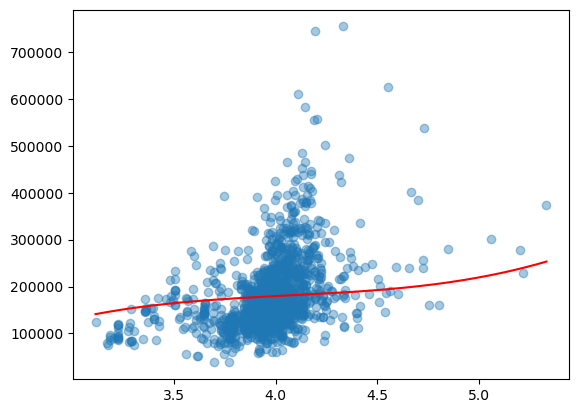

In [67]:
# let's see how a plot of the most impactful feature looks

feature_of_interest = 'LogOfLotArea'
model = house_model_poly_reduced

y = df.SalePrice
observed = df
Xfit = make_plot_table(model, feature_of_interest)

yfit = model.predict(Xfit)

fig, ax = plt.subplots()
ax.scatter(observed[feature_of_interest], y, alpha=.4)
ax.plot(Xfit[feature_of_interest], yfit, c='r')

# each feature individually does not look like a great fit, but predicted vs actual seems to perform well